# Step 1: Setting up The Enviornment

pip install yfinance pandas matplotlib seaborn statsmodels scikit-learn

# Step 2: Fetching Historical Data

In [1]:
import yfinance as yf

ticker = 'NVDA'
stock_data = yf.download(ticker, start='2014-01-01', end='2025-06-08')

C:\Users\da\AppData\Local\Temp\ipykernel_840\870003945.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start='2014-01-01', end='2025-06-08')
[*********************100%***********************]  1 of 1 completed


In [2]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2014-01-02,0.373932,0.376761,0.370631,0.375346,260092000
2014-01-03,0.369452,0.375347,0.368273,0.374639,259332000
2014-01-06,0.374403,0.377233,0.369688,0.373225,409492000
2014-01-07,0.380533,0.381948,0.375582,0.378176,333288000
2014-01-08,0.385720,0.387607,0.380533,0.381948,308192000


# Step 3: EDA

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

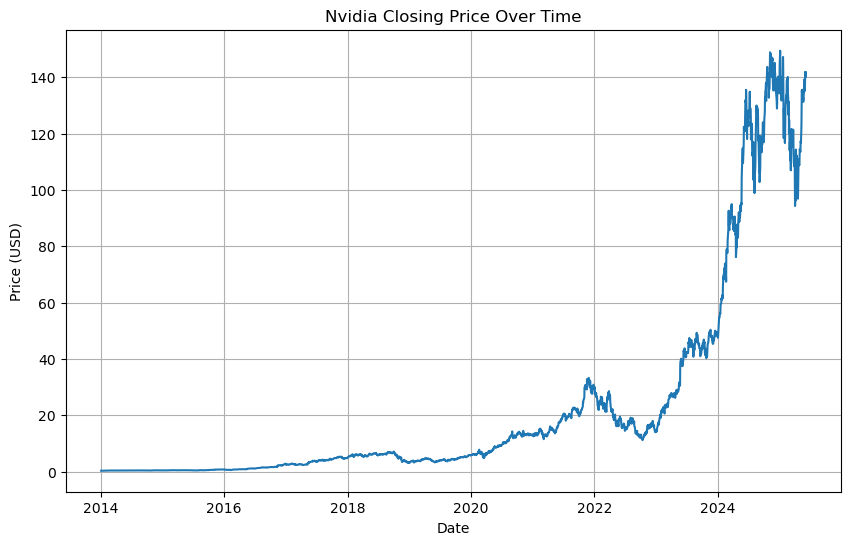

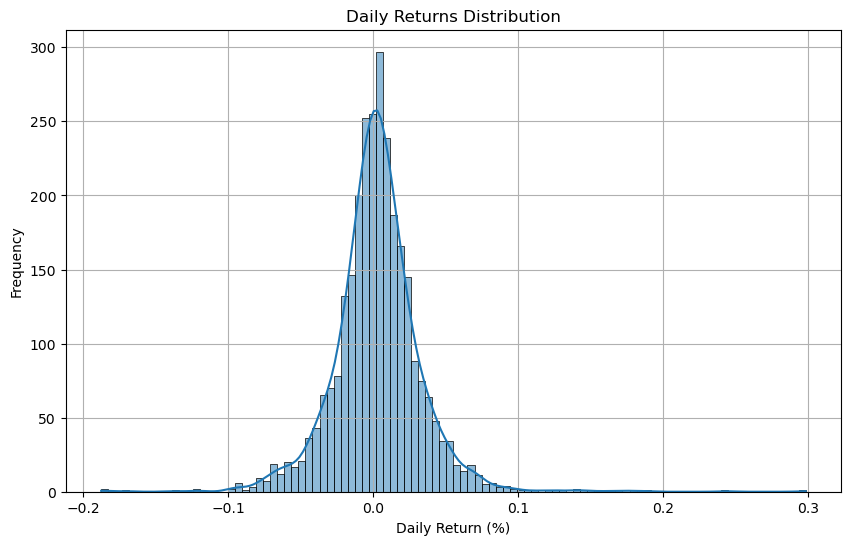

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
plt.plot(stock_data['Close'])
plt.title('Nvidia Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

stock_data['Daily Return'] = stock_data['Close'].pct_change()

plt.figure(figsize=(10,6))
sns.histplot(stock_data['Daily Return'].dropna(), bins=100, kde=True)
plt.title('Daily Returns Distribution')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 4: Building a Time-Series Forecast Model (ARIMA)

In [5]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

In [6]:
data = stock_data['Close'].dropna()

In [7]:
train = data[: int (0.9 * len(data))]
test = data[ int (0.9 * len(data)) :]

model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

C:\Users\da\miniconda3\envs\amiteshwar\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\da\miniconda3\envs\amiteshwar\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\da\miniconda3\envs\amiteshwar\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [8]:
forecast = model_fit.forecast(steps=len(test))

C:\Users\da\miniconda3\envs\amiteshwar\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\da\miniconda3\envs\amiteshwar\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


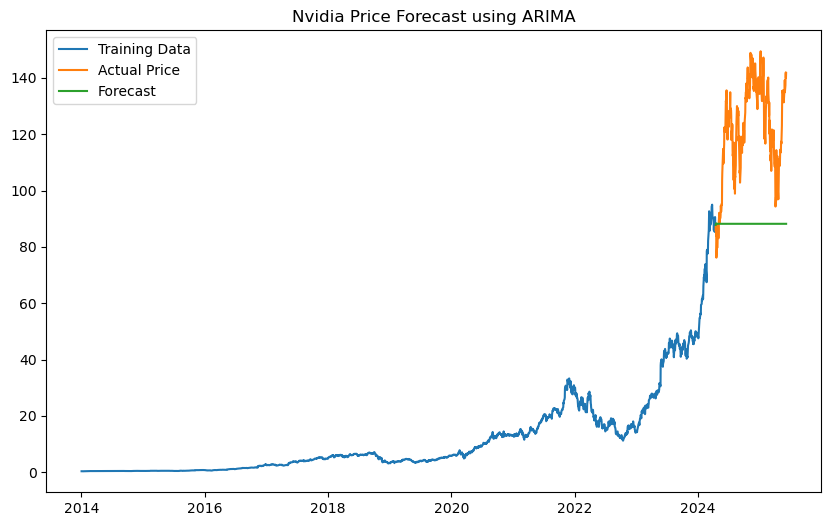

In [9]:
plt.figure(figsize=(10,6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Price')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title('Nvidia Price Forecast using ARIMA')
plt.savefig("price_plot.png")
plt.show()

# Step 5: Evaulating the Forecast

In [10]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [11]:
rmse = np.sqrt(mean_squared_error(test, forecast))
rmse

np.float64(37.41525319961078)

# Step 6: Evaluating Model Performance

In [12]:
print("Mean Price:", stock_data['Close'].mean())

Mean Price: Ticker
NVDA    22.820663
dtype: float64


In [13]:
print("Max Price:", stock_data['Close'].max())

Max Price: Ticker
NVDA    149.416245
dtype: float64


In [14]:
print("Min Price:", stock_data['Close'].min())

Min Price: Ticker
NVDA    0.362143
dtype: float64


# Conslusion:

An RMSE of USD 37.41 is very high compared to the stock's average price of USD 22.82. That means the model is way off in its predictions. This is likely due to high volatility or model limitations. Future improvements may include using LSTM or other models better suited to non-linear behavior.